In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import concurrent.futures
import random
import stock_analisys.packages.paths as paths
import pandas as pd
import time
import stock_analisys.packages.fundamentei_class as fc
import stock_analisys.packages.plots_fundamentei as fundamentei_plot
import stock_analisys.packages.bastter_class as bc
import stock_analisys.packages.plots_bastter as bastter_plot
import webbrowser

# Plot Config 

In [36]:
def complete_study(ticker):
    fundamentei_plot.main(ticker)
    bc.main_extract(ticker)
    time.sleep(1)
    bastter_plot.main(ticker)
    webbrowser.open_new_tab(f'https://bastter.com/mercado/stock/{ticker}')
    webbrowser.open_new_tab(f'https://financials.morningstar.com/income-statement/is.html?t={ticker}&region=usa&culture=en-US')

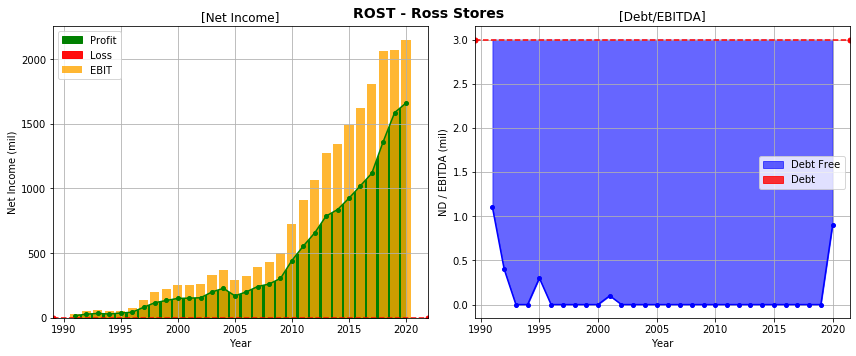

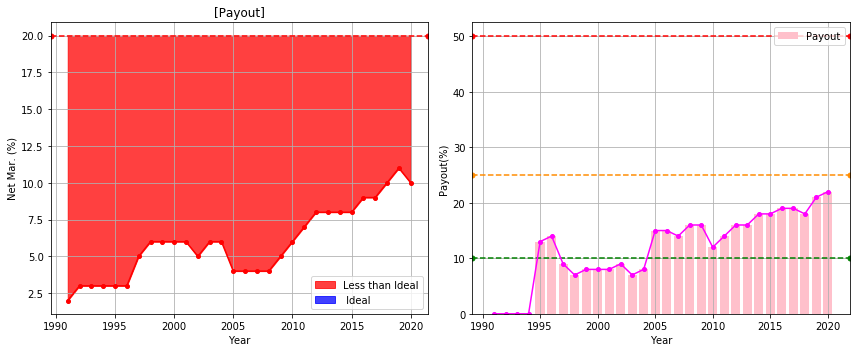

Cookies Sucessifuly Loaded
----------------------------------------------------
HTML for ROST captured successifuly


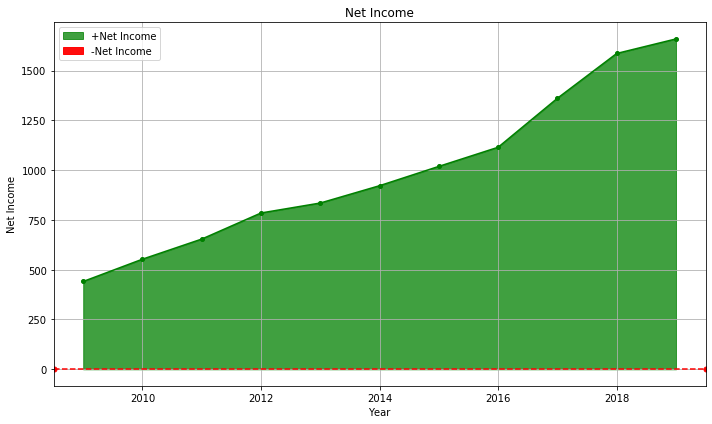

Not possible to print Variance


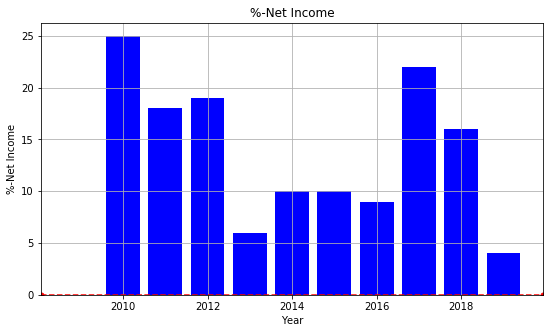

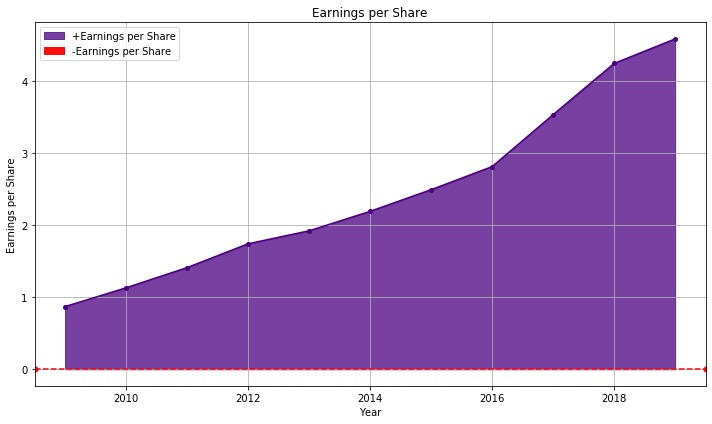

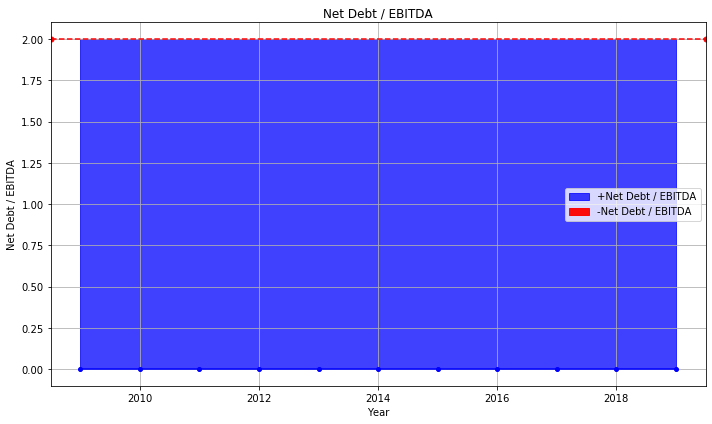

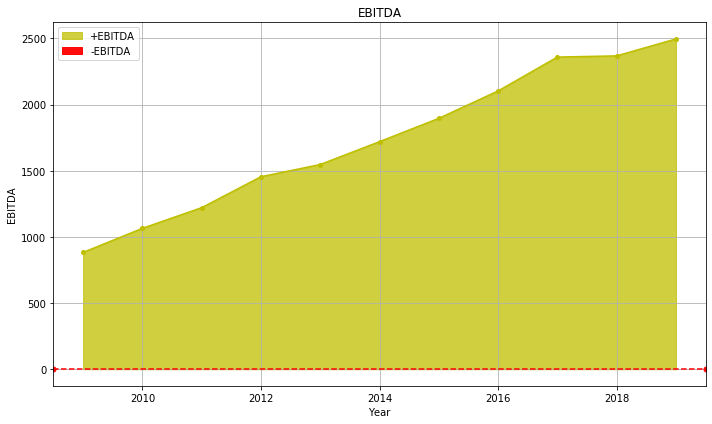

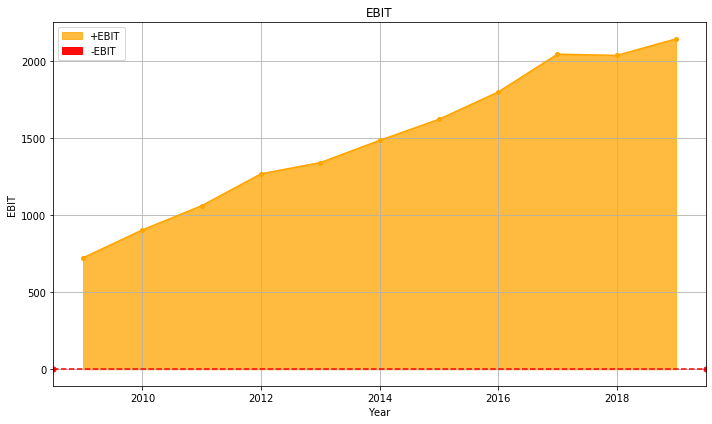

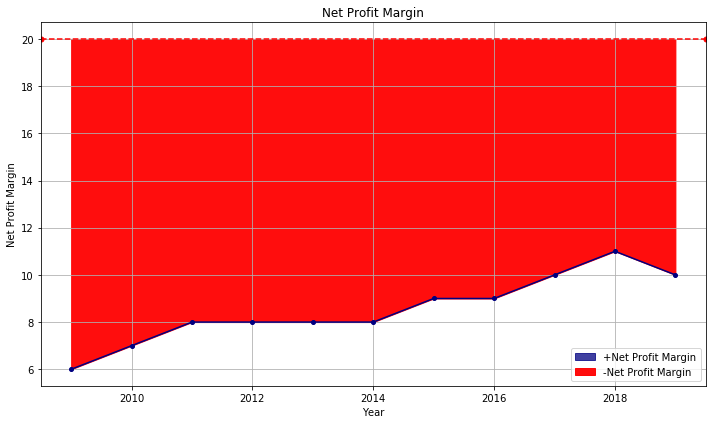

In [37]:
complete_study('rost')